# TensorFlowでCIFAR-10のデータセットを画像認識

tensorflow 2.xを使う。

In [1]:
%tensorflow_version 2.x

ライブラリのインポート

In [2]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

データの読み込み

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

170508288/170498071 [==============================] - 2s 0us/step


元データの確認

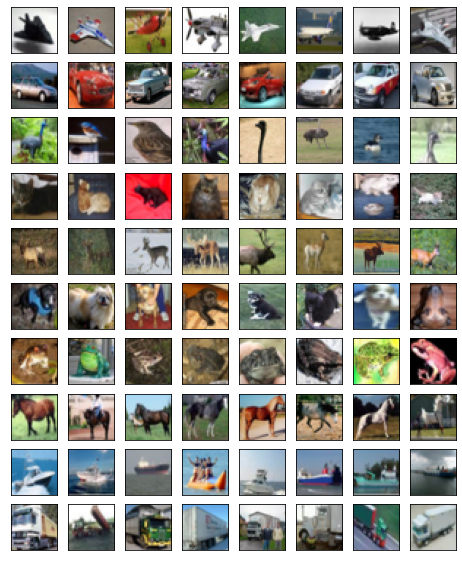

In [5]:
fig = plt.figure(figsize = (8, 10))
c = 0
for i in range(10):
  for j in range(len(train_images)):
    if np.argmax(train_labels[j]) == i:
      c += 1
      subplot = fig.add_subplot(10, 8, c)
      subplot.set_xticks([])
      subplot.set_yticks([])
      subplot.imshow(train_images[j])
      if c % 8 == 0:
        break

データ拡張

In [6]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = [0.8, 1.2],
    horizontal_flip = True,
    channel_shift_range = 0.2
)

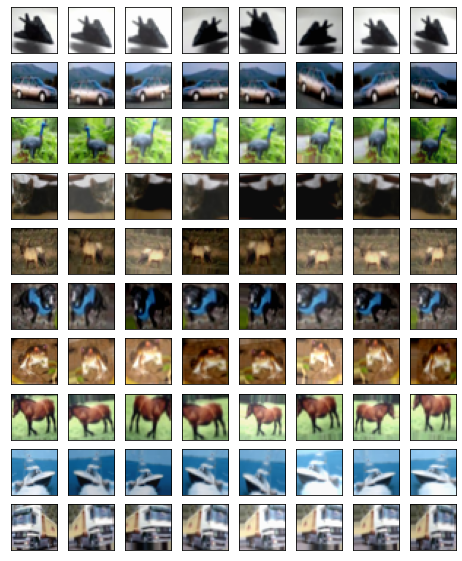

In [8]:
fig = plt.figure(figsize = (8, 10))
c = 0
for i in range(10):
  for j in range(len(train_images)):
    if np.argmax(train_labels[j]) == i:
      break
  c += 1
  subplot = fig.add_subplot(10, 8, c)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.imshow(train_images[j])

  for _ in range(7):
    img = datagen.flow(np.array([train_images[j]]), batch_size = 1)[0][0]
    c += 1
    subplot = fig.add_subplot(10, 8, c)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(img)

モデルの定義

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, 
                        (3, 3),
                        padding = "same",
                        kernel_initializer = initializers.TruncatedNormal(),
                        use_bias = True,
                        activation = "relu",
                        input_shape = (32, 32, 3),
                        name = "conv_filter1-1"))
model.add(layers.Conv2D(32,
                        (3,3),
                        padding = "same",
                        kernel_initializer = initializers.TruncatedNormal(),
                        use_bias = True,
                        activation = "relu",
                        name = "conv_filter1-2"))
model.add(layers.MaxPooling2D((2, 2),
                              name = "max_pooling1"))
model.add(layers.Dropout(rate = 0.25,
                         name = "dropout1"))
model.add(layers.Conv2D(64,
                        (3, 3),
                        padding = "same",
                        kernel_initializer = initializers.TruncatedNormal(),
                        use_bias = True,
                        activation = "relu",
                        name = "conv_filter2-1"))
model.add(layers.Conv2D(64,
                       (3, 3),
                       padding = "same",
                       kernel_initializer = initializers.TruncatedNormal(),
                       use_bias = True,
                       activation = "relu",
                       name = "conv_filter2-2"))
model.add(layers.MaxPooling2D((2, 2),
          name = "max_pooling2"))
model.add(layers.Dropout(rate = 0.25,
                         name = "dropout2"))
model.add(layers.Flatten(name = "flatten"))
model.add(layers.Dense(512,
                       activation = "relu",
                       kernel_initializer = initializers.TruncatedNormal(),
                       name = "hidden"))
model.add(layers.Dropout(rate = 0.5,
                         name = "dropout3"))
model.add(layers.Dense(10, 
                       activation = "softmax",
                       name = "softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_filter1-1 (Conv2D)      (None, 32, 32, 32)        896       
_________________________________________________________________
conv_filter1-2 (Conv2D)      (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 16, 16, 32)        0         
_________________________________________________________________
dropout1 (Dropout)           (None, 16, 16, 32)        0         
_________________________________________________________________
conv_filter2-1 (Conv2D)      (None, 16, 16, 64)        18496     
_________________________________________________________________
conv_filter2-2 (Conv2D)      (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 8, 8, 64)         

モデルのコンパイル

In [12]:
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["acc"])

モデルの学習

In [13]:
batch_size = 64
history = model.fit_generator(
    datagen.flow(train_images, train_labels, batch_size = batch_size),
    validation_data = (test_images, test_labels),
    steps_per_epoch = len(train_images) / batch_size,
    epochs = 20
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
781/781 [==============================] - 313s 399ms/step - loss: 1.7926 - acc: 0.3411 - val_loss: 1.3676 - val_acc: 0.4943
Epoch 2/20
781/781 [==============================] - 322s 412ms/step - loss: 1.4576 - acc: 0.4678 - val_loss: 1.1842 - val_acc: 0.5675
Epoch 3/20
781/781 [==============================] - 309s 395ms/step - loss: 1.3136 - acc: 0.5306 - val_loss: 1.1158 - val_acc: 0.6021
Epoch 4/20
781/781 [==============================] - 308s 394ms/step - loss: 1.2210 - acc: 0.5637 - val_loss: 1.0339 - val_acc: 0.6355
Epoch 5/20
781/781 [==============================] - 316s 405ms/step - loss: 1.1611 - acc: 0.5870 - val_loss: 0.9656 - val_acc: 0.6572
Epoch 6/20
781/781 [==============================] - 335s 429ms/step - loss: 1.1107 - acc: 0.6065 - val_loss: 0.9792 - val_acc: 0.6532
Epoch 7/20
781/781 [==============================] - 333s 426ms/step - loss: 1.0760 - acc: 0.6190 - val_loss: 0.8257 - val_acc: 0.7097
Epoch 8/20
781/781 [============================

学習結果

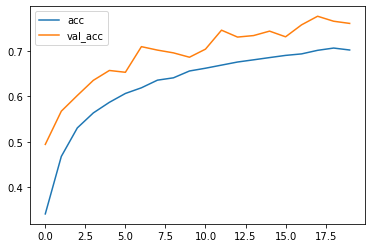

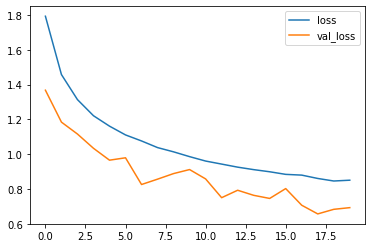

In [14]:
DataFrame({"acc": history.history["acc"],
           "val_acc": history.history["val_acc"]}).plot()
DataFrame({"loss": history.history["loss"],
           "val_loss": history.history["val_loss"]}).plot()

先頭の30個の結果(predict/answer)


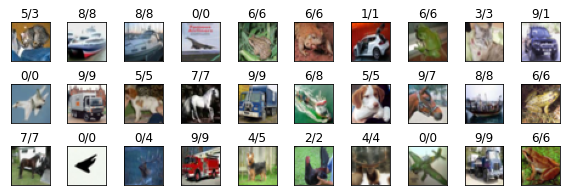

In [15]:
print("先頭の30個の結果(predict/answer)")

out_put = model.predict(test_images[:30])
fig = plt.figure(figsize = (10, 3))
for i in range(3):
  for j in range(10):
    subplot = fig.add_subplot(3, 10, 10 * i + j + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    pre = np.argmax(out_put[10 * i + j])
    ans = np.argmax(test_labels[10 * i + j])
    subplot.set_title("{}/{}".format(pre, ans))
    plt.subplots_adjust(hspace = 0.6)
    subplot.imshow(test_images[10 * i + j])